# Bài tập 3
## Yêu cầu: Sử dụng PCA sklearn để giảm chiều dữ liệu
- Cho tập tin original.png. Đọc tập tin original.png và hiển thị ảnh gốc
- Áp dụng PCA: giảm chiều dữ liệu còn 100 chiều (gốc là 1440)
- Hiển thị ảnh với dữ liệu đã giảm chiều

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA

%config Completer.use_jedi = False

In [5]:
img = Image.open('data/original.png') # size: (x=1440, y=960), type: PIL.PngImagePlugin.PngImageFile

In [4]:
# hiển thị ảnh gốc
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.show()

NameError: name 'img' is not defined

<Figure size 900x600 with 0 Axes>

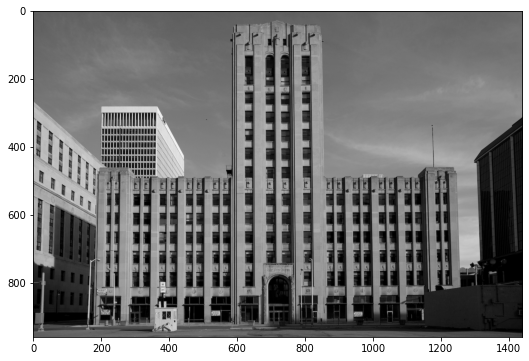

In [4]:
# convert an image to grayscale
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray)
plt.show()

In [5]:
# tạo array 1 chiều img_arr từ imggray
img_arr = np.array(list(imggray.getdata(band=0)), float)
# chuyển sang array 2 chiều
img_arr.shape = (imggray.size[1], imggray.size[0]) # size: (960, 1440)

In [6]:
img_arr

array([[ 91.,  92.,  93., ..., 106., 105., 105.],
       [ 91.,  92.,  93., ..., 105., 105., 106.],
       [ 90.,  92.,  92., ..., 105., 106., 106.],
       ...,
       [ 95.,  95.,  94., ...,  61.,  56.,  59.],
       [ 93.,  93.,  93., ...,  60.,  57.,  70.],
       [ 90.,  91.,  92., ...,  61.,  61.,  81.]])

In [7]:
# thực hiện giảm chiều img_arr từ 1440 xuống còn 100
# create the transform
k = 100
pca = PCA(n_components=k)
# fit transform
pca.fit(img_arr)
B = pca.transform(img_arr) # B ma trận là kết quả

In [8]:
# kiểm tra
print('dữ liệu gốc:', img_arr.shape) # ảnh gốc: 1440 cột
print('dữ liệu biến đổi:', B.shape) # ảnh biến đổi: 100 cột

dữ liệu gốc: (960, 1440)
dữ liệu biến đổi: (960, 100)


In [9]:
# chuyển ma trận B trở về image
img_arr_new = pca.inverse_transform(B) 

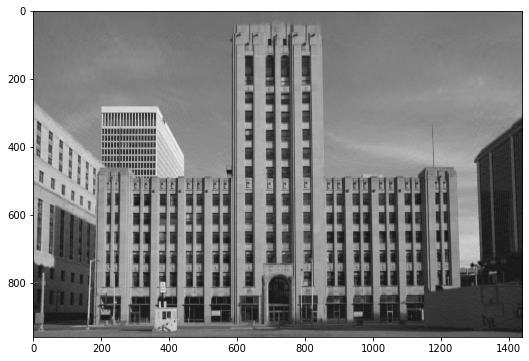

In [10]:
# hiển thị ảnh đã biến đổi
plt.figure(figsize=(9, 6))
plt.imshow(img_arr_new, cmap = plt.cm.gray)
plt.show()